### Matemáticas para Data Science: Estadística Descriptiva

En este articulo nos apoyaremos de las librerias Numpy y Pandas.

[Aprende a usar Numpy](https://www.youtube.com/watch?v=G8t7gMgY5JM&list=PLg9145ptuAij_8zYgMeqwOV8ABwRYLuR3)

[Aprende a usar Pandas](https://www.youtube.com/watch?v=1CIZFu_qWvk&list=PLjdo6jnQHJFYUxftilqXD1pgzq9E9yJze)


In [1]:
# Dependencias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tema 1: ¿Para qué sirve la estadística descriptiva?

## Estadística descriptiva vs. inferencial

### Diferencia entre descriptiva vs inferencial

**La estadística descriptiva**

 es la técnica matemática que obtiene, **organiza**, **presenta** y **describe un conjunto de datos para facilitar el uso**, generalmente con el apoyo de tablas, medidas numéricas o gráficas. En resumen la estadistica descriptiva trata de resumir informacion

**La estadística inferencial**

Es una parte de la estadística que comprende los métodos y procedimientos que **por** medio de la **inducción determina propiedades de una población estadística**, a partir de una parte de esta. **Su objetivo** es **obtener conclusiones** útiles **para hacer deducciones** sobre una totalidad, **basándose** en la información numérica **de la muestra**.

### Puedes mentir con estadistica?

- **El resultado podría estar sesgado a nuestro criterio personal**, mostrando mayor interés a un cierto parámetro. dejando de lado a otro que también podría ser relevante. Mostramos solo una cara de la moneda.

- **No existen definiciones objetivas en estadística**, sin embargo sobre estas definiciones podemos realizar cálculos exactos lo cual es un problema

- **Los diferentes estadísticos** descriptivos **dan nociones diferentes sobre los mismos datos**.

> "Con frecuencia construimos un caso estadistico con datos imperfectos, como resultado hay numerosas razones por las cuales individuos intelectuaels respetables pueden no estar de acuerdo sobre los resultados estadisticos."  
> *-Naked Statistics, Charles Wheelan*

### ¿Por que aprender estadística?

A pesar de los problemas que pueda presentar es muy importante entender que la estadística nos puede ayudar a:

- Resumir grandes cantidades de información.
- tomar mejores decisiones.
- responder preguntas con relevancia social (economia, politica, etc).
- reconocer patrones en los datos.
- descubrir a quien usan estas herramientas para mentir sobre informacion.

Hay que entender que resumir informacion conlleva perder informacion, y no caer en las verdades a medias, que omiten el contexto globar para usar como elemento engañoso para tergiversar la verdad.

## Flujo de trabajo en data science
![](https://www.oreilly.com/library/view/machine-learning-design/9781098115777/assets/mldp_0102.png)

Como son los casos especificos donde se encuentra la estadistica?

- **Ingesta de datos y Validación:**

    Se encarga de todo el procesamiento de **ETL** (Extract Transform Load) **obtener los datos**, **limpiarlos** y **estructurarlos**, **crear pipelines de análisis automatizado**, es decir que transformaciones vamos a realizar a los datos para que estén listos para el caso especifico de estudio que vamos a realizar.

- **Preparación y entrenamiento del modelo:**

    En este bloque **se va a realizar** un **análisis exploratorio de los datos con estadística descriptiva**, entender **correlaciones** y realizar posibles **reducciones de datos**.

- **Evaluar el modelo, Producción e Interacción:**

    esta parte del flujo se basa mas en la **estadística inferencial**.

[Acelerar el flujo de trabajo en Ciencia de Datos BBVA](https://www.bbvaaifactory.com/es/accelerating-data-science-workflows/)

## Plan del curso

La estadistica descriptiva es un area comun de las matematicas, hay una numerosa cantidad de libros, articulos, apuntes y cursos que tratan este tema.

Pero en este curso se guiara la Estadistica Descriptiva en el caso particular de Ciencias de Datos, entender no solo las formulas matematicas que estan detras de las estadisticas descriptivas que debemos calcular, sino tambien en el contexto que da el libro [Naked Statistic](https://www.amazon.com/-/es/Charles-Wheelan-ebook/dp/B007Q6XLF2/), a como indentificar cual es la cara correcta de la moneda dependiendo del contexto.

**Del bloque de flujo de trabajo en Data Science se trabajara:**

Estadísticas para ingesta y procesamiento

- Conocer los tipos de datos: si son numéricos, cadenas de texto, estructurado, etc.
- Pipeline o flujo de procesamiento de estos: lo que haremos a los datos para que sean útiles.

Estadística para analítica y exploración

- Análisis exploratorio de los datos, base de la estadística descriptiva.
- Identificar correlaciones para buscar la reducción del conjunto de datos

# Tema 2: Estadística descriptiva para analítica

## Tipos de datos en estadística inferencial 

Aquí tenemos en cuenta los diferentes tipos de datos o variables estructuradas en cualquier problema de ciencia de datos.

### datos categóricos: 
* **ordinales (object)**

    Los datos ordinales representan unidades discretas y ordenadas, su orden es importante.


* **nominales (bool)**

    Se usan para etiquetar variables que no tienen un valor cuantitativo.
    
    Estos datos no tienen un orden, aunque cambiara el orden de sus valores, no cambia su significado.

### datos numéricos: 
* **discretos (int64)**
    Se dice que una variable es discreta cuando no puede tomar ningún valor entre dos consecutivos
    
    Un objeto discreto tiene límites conocidos y definibles. Es fácil definir con precisión dónde comienza y dónde termina el objeto.



* **continuos (float64)**
    Las variables continuas pueden tomar cualquier valor dentro de un intervalo.
    Los datos continuos representan mediciones y, por lo tanto, sus valores. no se pueden contar, pero se pueden medir. 
     
a continuación exploraremos un dataset que contiene todos estos tipos de datos: https://www.kaggle.com/lepchenkov/usedcarscatalog

In [2]:
df = pd.read_csv('./cars.csv')
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


los tipos de datos de cada columna en el dataset se pueden obtener directamente con `pandas.DataFrame.dtypes` 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

In [3]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

Aquí vemos que los tipos de datos se identifican de la siguiente manera: 

* Categoricos: `object`, `bool`
* Numéricos: `int64` (discreto), `float64` (contínuo)

Ahora, con la libreria pandas podemos generar un conjunto completo de estadisticos descriptivos del dataset usando `pandas.DataFrame.describe()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [4]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


En los siguientes capitulos trabajaremos con los siguientes tipos de estadisticos descriptivos

- **Medidas de tendencia Central:**
 
Mide como ese promedio o medida unica con una nocion de donde estan los datos

- **Medidas de dispersión:**
 
Me dicen respecto a la medida central que tan dispersos estan los datos

## Medidas de tendencia central

### Que son las Medidas de tendencia central?

Son medidas estadísticas que **pretenden resumir en un solo valor** a **un conjunto de valores**. Representan un centro en torno al cual se encuentra ubicado el conjunto de los datos. **Las medidas** de tendencia central **más utilizadas** son: **media**, **mediana** y **moda**


### Media Arimetica

En **matemáticas** y **estadística**, la media aritmética, también llamada promedio o simplemente media, se obtiene como la suma de un conjunto de valores dividida entre el número total de sumandos.

Dados los n números ${ \{x_{1},x_{2},\ldots ,x_{n}\}}$, la **media aritmética** se define como:

$$
{\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}
$$


Por ejemplo, la media aritmética de 8, 5 y -1 es igual a:



$$
 \bar{x} = \frac{ 8 + 5 + \left ( -1 \right ) }{3} = 4 
$$

#### Ejemplo con Codigo

In [5]:
salarios = np.random.randint(1600,8000,100) # Creamos 100 salarios aleatorios donde el min es 1600 y max 8000

suma_salarios = np.sum(salarios)
numero_total_de_salarios = len(salarios)

media_arimetica = suma_salarios/numero_total_de_salarios

print(f"""
La suma del conjuto de salarios es: {suma_salarios}
La cantidad de salarios sumados es: {numero_total_de_salarios}
             La media arimetica es: {media_arimetica}
""")


La suma del conjuto de salarios es: 473424
La cantidad de salarios sumados es: 100
             La media arimetica es: 4734.24



### Mediana (para conjuntos ordenados)

Sean ${ x_{1},x_{2},x_{3},\ldots ,x_{n}}$ los datos de una muestra **ordenada** en orden creciente y designando la mediana como ${ M_{e}}$, distinguimos dos casos:

#### Si n es impar

La mediana es el valor que ocupa la posición $(n+1)/2$ una vez que los datos han sido ordenados (en orden creciente o decreciente), porque este es el valor central. 

Es decir: 

$
M_{e}=x_{{(n+1)/2}}
$

Por ejemplo, si tenemos 5 datos, que ordenados son: 

$x_{1}=3,$

$x_{2}=6,$ 

$x_{3}=7,$ 

$x_{4}=8,$ 

$x_{5}=9$

El valor central es el tercero: 

$$
x_{(5+1)/2}=x_{3}=7
$$

Este valor, que es la mediana de ese conjunto de datos, deja dos datos por debajo ($x_{1}$, $x_{2}$) y otros dos por encima de él (${ x_{4}}$, ${ x_{5}}$).

#### Ejemplo con Codigo Impar

In [6]:
notas = np.linspace(1,10, 7).round()

datos = len(notas)

indice_mediana = int((datos-1)/2) # En programacion el indice empieza desde el 0, no el 1, por eso se resta 1

mediana = notas[indice_mediana]

print(f"""
            La lista de notas es: {notas}
La cantidad de notas cargadas es: {datos}
      El indice de la mediana es: {indice_mediana}
       El valor de la Mediana es: {mediana}
""")


            La lista de notas es: [ 1.  2.  4.  6.  7.  8. 10.]
La cantidad de notas cargadas es: 7
      El indice de la mediana es: 3
       El valor de la Mediana es: 6.0



#### Si n es par

, la mediana es la media aritmética de los dos valores centrales. Cuando $n$ es par, los dos datos que están en el centro de la muestra ocupan las posiciones $n/2$ y ${(n/2)+1}$. 

Es decir: 

$$
{ M_{e}=(x_{\frac {n}{2}}+x_{{\frac {n}{2}}+1})/2}
$$

Por ejemplo, si tenemos 6 datos, que ordenados son:

$x_{1}=3,$

$x_{2}=6,$ 

$x_{3}=7,$ 

$x_{4}=8,$ 

$x_{5}=9$

$x_{6}=10$

Hay dos valores que están por debajo del $x_{{{\frac  {6}{2}}}}=x_{3}=7$ y otros dos que quedan por y otros dos que quedan por encima del siguiente dato $x_{{{\frac  {6}{2}+1}}}=x_{4}=8$

Por tanto, la mediana de este grupo de datos es la media aritmética de estos dos datos: 
$$
M_{e}={\frac  {x_{3}+x_{4}}{2}}={\frac  {7+8}{2}}=7,5
$$
#### Ejemplo con Codigo Par

In [7]:
notas = np.linspace(1,10, 8).round()
mediana = np.median(notas)
print(mediana)

5.5


### Moda

Es el valor que aparece con **mayor frecuencia** en un conjunto de datos.

Una **distribucion bimodal** de los datos es en la que encontremos dos modas, es decir, **dos datos** que tengan la **frecuencia absoluta máxima**. 

Una **distribución trimodal** de los datos es en la que encontramos tres modas.

Para mas de tres modas seria una **distribudion multimodal**

En el caso de la **distribución uniforme discreta**, cuando todos los datos tienen una **misma frecuencia**, se puede definir las modas como indicado, pero estos lores **no tienen utilidad**. Por eso algunos matemáticos califican esta distribución como ***"sin moda"***.

El **intervalo modal** es el de mayor frecuencia absoluta. Cuando tratamos con datos agrupados antes de definir la moda, se ha de definir el intervalo modal.

$$
x_k \text{ donde } \text{Freq}(x_k) = \max{(\text{Freq}(x_i))}
$$

### Diagrama de frecuencias

![](./img/diagrama%20de%20frecuencias.jpg)

Es un gráfico de líneas que se usa para presentar las frecuencias absolutas de los valores de una distribución en el cual la altura del punto asociado a un valor de las variables es proporcional a la frecuencia de dicho valor. Es un gráfico acumulativo.

### Cuando usar cual?
- La media es susceptible a valores atípicos. La medida resultante del promedio es afectada notablemente por los casos de excepsiones al conjunto de dato central.

- La moda no aplica para datos numéricos continuos.

### Datos extra
- [Media ponderada](https://es.wikipedia.org/wiki/Media_ponderada)
- [Media armónica](https://es.wikipedia.org/wiki/Media_arm%C3%B3nica)
- [Media geométrica](https://es.wikipedia.org/wiki/Media_geom%C3%A9trica)

### Metáfora de Bill Gates en un bar

Se nos pide calcular la media de salarios en un bar, tenemos los registros de 13 voluntarios donde sus sueldos rondaban entre los 25.000 a 45.000 dolares anuales, y tambien se encontraba Bill Gates que tiene un sueldo de 250.000 dolares anuales.


El promedio es de los sueldos es: $49949.857142857145
La mediana es de los sueldos es:  $34342.5 



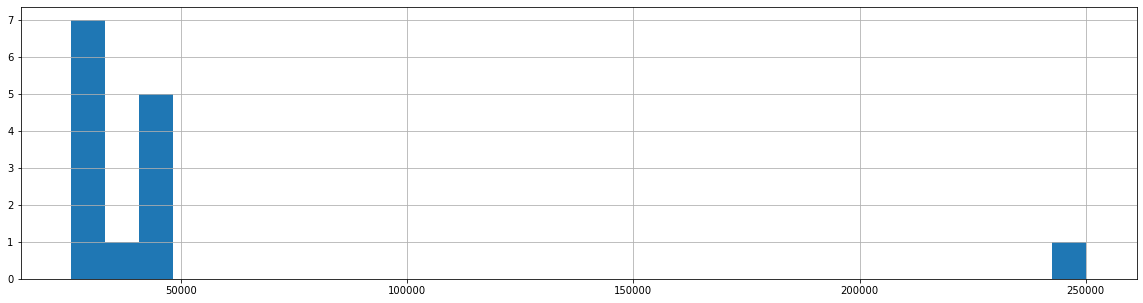

In [8]:
salarios = np.random.randint(25000,45000, 13)
bill_gates = np.array(250000)
salarios_y_bill_gates = np.union1d(salarios,bill_gates)

numeros_de_datos = len(salarios_y_bill_gates)

media_arimetica = np.mean(salarios_y_bill_gates)
mediana = np.median(salarios_y_bill_gates)


print(f"""
El promedio es de los sueldos es: ${media_arimetica}
La mediana es de los sueldos es:  ${mediana} 
""")

plt.figure(figsize=(20,5))
plt.hist(salarios_y_bill_gates, bins=30)
plt.grid()
plt.show()

#### Conclusiones
Vemos que segun la Media Arimetica, el sueldo promedio se encuentra en los $50 mil dolares, cuando este resultado es incluso mayor del maximo que gana cualquier voluntario en los datos (exceptuando por Bill Gates), mientras que la Mediana nos da un rango mas cercano a la realidad entre los $35mil dolares por voluntario, y en el histograma podemos ver que la centralidad de los datos esta tambien entre los $35mil dolares

**Dejando estas conclusiones:**

- Esta metáfora nos muestra que al tener valores atípicos nuestra media se vera sesgada o desviada.

- La mediana será un mejor valor para manejar un conjunto de datos con valores atípicos.

### Medidas de tendencia central en Python

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [9]:
df = pd.read_csv("./cars.csv") # Cargamos la base de datos
pd.options.display.max_columns = 0 # para visualiar todas las columnas
df # Visualizamos las dos primeras filas del BD

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490


In [10]:
# inspeccionemos el atributo de price_usd (variable numérica continua) de los autos listados en el dataset:

df['price_usd'].mean() # Vemos el promedio de precio en todo el catalogo

6639.971021255604

In [11]:
df['price_usd'].median() # Vemos la mediana en el catalogo

4800.0

<AxesSubplot:ylabel='Frequency'>

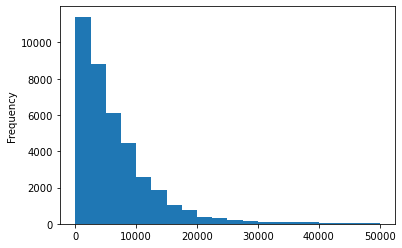

In [12]:
df['price_usd'].plot.hist(bins=20) # Graficamos el histograma

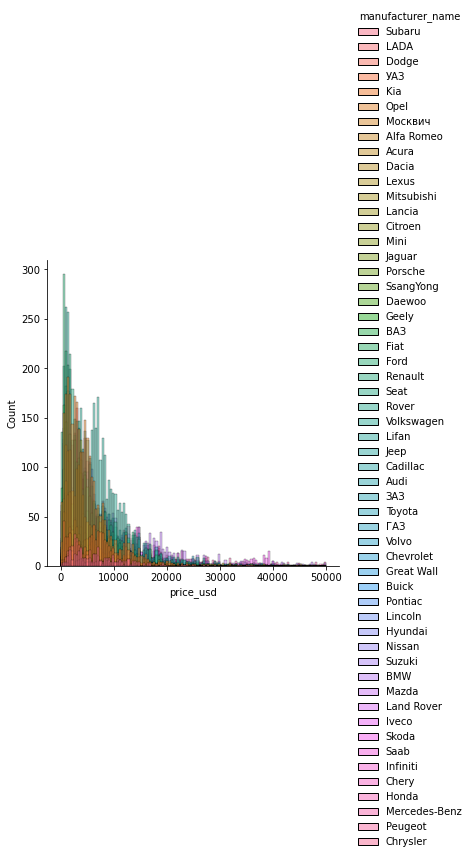

In [13]:
# resulta más interesante analizar los precios por marcas, asi que utilizaremos la libreria SeaBorn que se especializa para la visualizacion estadistica. 


sns.displot(data=df, x='price_usd', hue='manufacturer_name'); 

# Lo que vemos es que nos da de resultado un grafico muy sobrecargado, ,y al haber tantas categorias, el grafico pierde el proposito de facilitar la informacion

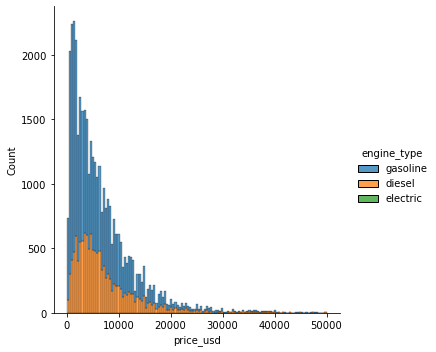

In [14]:
# Puede tener mas sentido analizar los autos por una categoria

sns.displot(data=df, x='price_usd', hue='engine_type', multiple='stack');

In [15]:
# No se aprecian los autos eléctricos en el histograma, así que haremos un conteo de los autos teniendo en cuenta si es a diesel, gasolina o electrico

df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


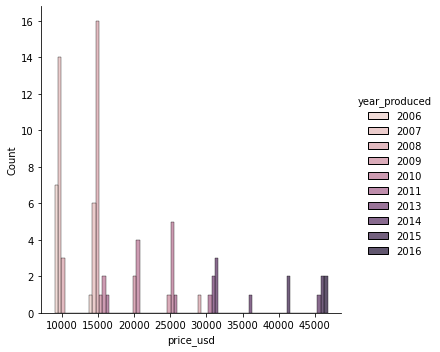

In [16]:
# El histograma anterior era dificil de analizar ya que no se podiamos ver los autos electricos

# Ahora inspeccionaremos los precios de una marca y modelo en particular para hacer la informacion mas facil de leer

Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')] # Filtramos con PanDas el DataFrame de los autos que queremos clasificar 

sns.displot(data=Q7_df, x='price_usd',hue='year_produced', multiple='dodge')


### Reto
Realiza una busqueda sobre el tipo de auto que te gustaria segun tus necesidades, la base de dato trabajada.

<AxesSubplot:xlabel='price_usd', ylabel='year_produced'>

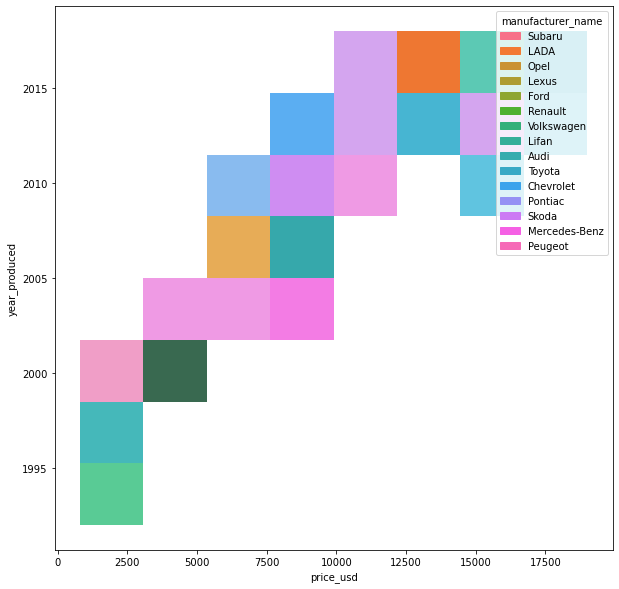

In [17]:
autaco = df[
    (df['transmission']=='automatic') & 
    (df['body_type'] > 'suv') & 
    (df['engine_capacity'] == 1.8)]

plt.figure(figsize=(10,10))

sns.histplot(data=autaco, x='price_usd' ,y='year_produced',hue='manufacturer_name', multiple='dodge')

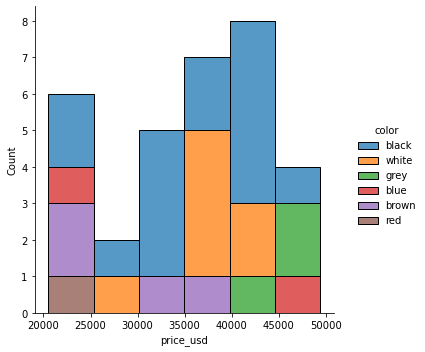

In [18]:
mercedes_benz = df[
    (df['manufacturer_name']=='Mercedes-Benz') &
    (df['body_type']=='suv') &
    (df['year_produced']>2013) 
    ]
sns.displot(data=mercedes_benz, x='price_usd', hue='color', multiple='stack')

## Medidas de dispersión
**Las medidas de dispersión** (también llamadas variabilidad, dispersión o propagación), comúnmente utilizadas en la estadística descriptiva y **buscan señalar la distribucion de las variables** creando intervalos **en un conjunto de datos** y **resumir dicha información en un solo valor** tomando como punto de referencia la media aritmética (promedio). 

Es necesario mencionar que **entre más grande su valor mayor será la dispersión** de los datos de una distribución, lo que se traduce a una menor exactitud y más inconsistencias y/o diferencias.

### Rango
Puede ser encontrado como recorrido, **es la diferencia entre el extremo mayor y el extremo menor de un conjunto de datos**, cuanto mayor es el rango, aún más dispersos están los datos. Nos deja ver que tan grande puede ser una variación o un cambio



Ejemplo:

Dado el conjunto de datos desordenados:
$$
x_{1}=185,x_{2}=165,x_{3}=170,x_{4}=182,x_{5}=155
$$
es posible ordenar los datos como sigue:
$$
x_{(1)}=155,x_{(2)}=165,x_{(3)}=170,x_{(4)}=182,x_{(5)}=185
$$
De este modo, **el rango sería** la **diferencia** entre el **valor máximo** $X_M$ y **el mínimo** $X_m$ , lo que es lo mismo:

$$
R = X_M - X_m
$$

En nuestro ejemplo, con cinco valores, nos da que $R=185-155=30$

In [23]:
conjunto_de_datos = np.array([185,165,170,182,155])
x_maximo = conjunto_de_datos.max()
x_minimo = conjunto_de_datos.min()
R = x_maximo-x_minimo
print(R)

30


### Rango intercuartil

En estadística descriptiva, se le llama **rango intercuartílico** o rango intercuartil, a la **diferencia entre el tercer cuartil** $(Q3)$ **y el primer cuartil** $(Q1)$ de una distribución.

$$
RQ = Q3 - Q1. 
$$

#### **Cuartiles**

Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales.

- **1er cuartil** **(Q1)**

25% de los datos es menor que o igual a este valor.

- **2do cuartil** **(Q2)**

La mediana. 50% de los datos es menor que o igual a este valor.

- **3er cuartil** **(Q3)**

75% de los datos es menor que o igual a este valor.

- **Rango intercuartil**

La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

#### **Diagrama de caja o box plot**

representa gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos. También puede representar los valores atípicos de estos.



Cuartiles con Numpy
 
1er cuartil: 165.0
2do cuartil: 170.0
3er cuartil: 182.0

Diagrama de caja


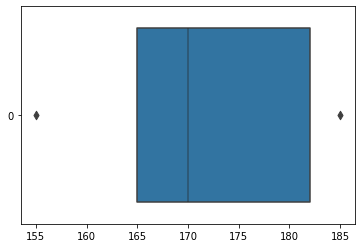

In [77]:
print('Cuartiles con Numpy')
print(f""" 
1er cuartil: {np.quantile(conjunto_de_datos,0.25)}
2do cuartil: {np.quantile(conjunto_de_datos,0.50)}
3er cuartil: {np.quantile(conjunto_de_datos,0.75)}
""") # Cuartiles con Numpy

# print('Cuartiles con Pandas')
# display(pd.DataFrame(conjunto_de_datos).describe()) # Forma de sacar mas facil los cuartiles con PanDas

print('Diagrama de caja')
sns.boxenplot(data=conjunto_de_datos, orient='horizontal');

### Desviacion estandar 

#### Que es la varianza
es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media. Formalmente se calcula como la suma de los residuos al cuadrado divididos entre el total de observaciones. Su fórmula es la siguiente:
##### Formula Fundamentales

**Promedio**

$\overline{x} = {\displaystyle \mu ={\frac {1}{N}}\sum_{i=1}^{N}x_{i}}$

**Varianza Poblacional**

${\displaystyle \sigma^2 = \frac{1}{n} *{\sum _{i=i}^{n}} (x_{i}-\mu)^2}\rightarrow$ Poblacion

**Varianza Muestral**

${\displaystyle \sigma_{sample}^{2} = \frac{1}{n-1} *{\sum _{i=i}^{n}} (x_{i}-\mu)^2}\rightarrow$ Muestra

**Ejemplo de un dado**

Un dado de seis caras puede representarse como una variable aleatoria discreta que toma, valores del 1 al 6 con probabilidad igual a $\frac{1}{6}$. 

Primero calculamos el promedio

${\displaystyle\mu = \frac{(1+2+3+4+5+6)}{6}}$

${\displaystyle\mu = {3,5}}$ 

Por lo tanto, su varianza es:


${\displaystyle\sigma^2=\sum_{i=1}^6 \tfrac{1}{6} (i - 3,5)^2}$

${\displaystyle\sigma^2=\tfrac{1}{6}\left((-2,5)^2{+}(-1,5)^2{+}(-0,5)^2{+}0,5^2{+}1,5^2{+}2,5^2\right)}$

${\displaystyle\sigma^2=\tfrac{1}{6} \cdot 17,50 }$

${\displaystyle\sigma^2=\tfrac{35}{12} = 2.9166666666666665}$
___


#### Que es la desviación estándar
En estadística, **la desviación estándar** (también conocida como desviación típica y desvío típico), **representada** de manera abreviada **por la letra** griega minúscula **sigma** $\pmb\sigma$ o la letra latina s, así como por las siglas SD (de standard deviation, en textos del inglés) es una medida que **se utiliza para cuantificar la variación o la dispersión de un conjunto de datos numéricos**.​
##### Formula Fundamentales

${\displaystyle \sigma = \sqrt{\frac{1}{n} *{\sum _{i=i}^{n}} (x_{i}-\mu)^2}}$ Desviacion estandar Poblacional

${\displaystyle \sigma_{sample} = \sqrt{\frac{1}{n-1} *{\sum _{i=i}^{n}} (x_{i}-\mu)^2}}$ Desviacion estandar Muestra

Ejemplo de un dado

Continuano el ejercicio anterior del dado de 6 caras.

Podemos resumir que la desviación estándar es la raíz cuadrada de su varianza. Asi que procedemos a calcular la desviación estándar:

${\displaystyle\sigma^2=\tfrac{35}{12}}$

${\displaystyle\sigma=\sqrt{\tfrac{35}{12}}}$

${\displaystyle\sigma=1.707825127659933}$


### Valor Atipico (outliner)
En estadística, tales como muestras estratificadas, un valor atípico (en inglés outlier) es una observación que es numéricamente distante del resto de los datos. Las estadísticas derivadas de los conjuntos de datos que incluyen valores atípicos serán frecuentemente engañosas. Por ejemplo, en el cálculo de la temperatura media de 10 objetos en una habitación, si la mayoría tienen entre 20 y 25 ºC, pero hay un horno a 350 °C, la mediana de los datos puede ser 23, pero la temperatura media será 55. En este caso, la mediana refleja mejor la temperatura de la muestra al azar de un objeto que la media. Los valores atípicos pueden ser indicativos de datos que pertenecen a una población diferente del resto de las muestras establecidas.

Dentro de la distribucion normal / gaussiana

![](https://miro.medium.com/max/1400/1*ARpoeY3MdhFImq0JXAXtRw.png)

- Alrededor del **68,26 %** de todos los datos se encuentran dentro de una desviación estándar $( <σ )$ de la media $(μ)$, teniendo en cuenta ambos lados, la región rosa de la figura.

- Alrededor del **95,44 %** de todos los datos se encuentran dentro de dos desviaciones estándar $( 2σ )$ de la media $(μ)$, teniendo en cuenta ambos lados, la región rosa+azul de la figura.

- Alrededor del **99,72 %** de todos los datos se encuentran dentro de las tres desviaciones estándar $( <3σ )$ de la media $(μ)$, teniendo en cuenta ambos lados, la región rosa+azul+verde de la figura.

- Y el **0,28%** restante de todos los datos se encuentra fuera de las tres desviaciones estándar $( >3σ )$ de la media $(μ)$, teniendo en cuenta ambos lados, la pequeña región roja de la figura. Y esta parte de los datos se considera como valores atípicos .

- Los cuartiles primero y tercero, $Q1$ y $Q3$ , se encuentran a **-0.675σ** y **+0.675σ** de la media, respectivamente.

#### Deteccion de Outliers mediante IQR
Para definir los valores atipicos de una distribusion de datos simetricas usamos el metodo de deteccion de valores atipicos (outliers), ayudandonos del Rango intercuartílico
(IQR)
$$
$$

$$\text{Valor Atipico}
     \begin{cases}
         min = Q_1 -1.5*IQR \\
         max = Q_3 +1.5*IQR \\
     \end{cases}
$$

$$\text{Valor Extremo}
     \begin{cases}
         min = Q_1 -3*IQR \\
         max = Q_3 +3*IQR \\
     \end{cases}
$$
Todos los datos que se encuentren fuera de estos rangos se coincideran datos anomalos,
___
Pero cuando la distribucion de datos es sesgada no aplica el criterio anterior de $Q_3 \pm-1.5*IQR$
$$
     \begin{cases}
         min = Q_1 -1.5*f(IQR) \\
         max = Q_3 +1.5*g(IQR) \\
     \end{cases}
$$

<AxesSubplot:xlabel='price_usd', ylabel='Density'>

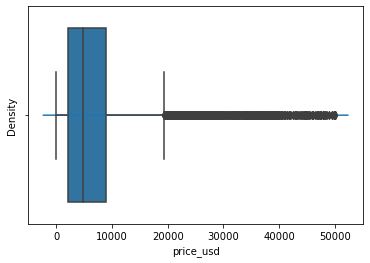

In [113]:
# sns.histplot(data=df, x="price_usd")
sns.kdeplot(data=df, x="price_usd")
sns.boxplot(data=df, x="price_usd")